# Examples of MDPs

### Structure

$\texttt{structure[i,j]}$ stores the type of the cell $\texttt{(i,j)}$. 
If $\texttt{structure[i,j]}$ is $\texttt{'E'}$. it means the cell is empty and the agent is free to move in any direction. If it is $\texttt{'B'}$. then the cell is blocked, the agent cannot go there.
If it is one of $\texttt{'D'}$.,$\texttt{'U'}$.,$\texttt{'R'}$. and $\texttt{'L'}$., the agent is free to enter the cell in any direction, but it cannot leave the cell in the opposite direction of the label.
    For example, if the label is $\texttt{'D'}$., then the agent cannot go up as if there is an obstacle there.
If it is $\texttt{'T'}$., then the cell is a trap cell, which means if the agent cannot leave the cell once it reaches it.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


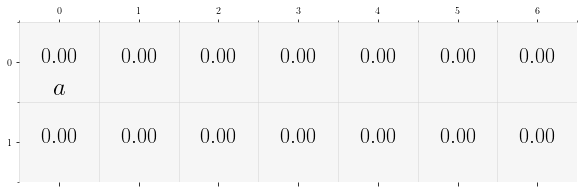

In [49]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 

shape = n_cols, n_rows = (2,7)

structure = np.array([
['E','E','E','E','E','E','E'],
['E','E','E','E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label2 = np.empty(shape,dtype=object)
label2.fill(())
label[0,0] = ('a',)
label2[1,6] = ('b',)
comb_labels = np.empty(shape, dtype=object)
comb_labels.fill(())
comb_labels[0,0] = ('a',)
comb_labels[1,6] = ('b',)


    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=10, p=1.0)
grid_mdp.plot()

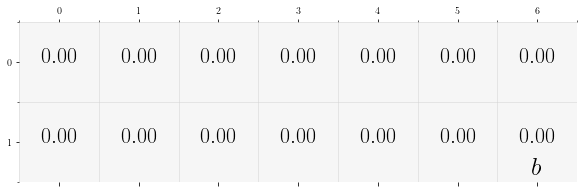

In [110]:
grid_mdp2 = GridMDP(shape=shape,structure=structure,label=label2,figsize=10,p=1.0)
grid_mdp2.plot()

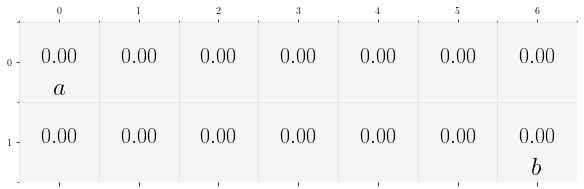

In [111]:
comb_mdp = GridMDP(shape=shape,structure=structure,label=comb_labels,figsize=10, p=1)
comb_mdp.plot()

In [112]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl1 = 'FG a'
ltl2 = 'FG b' # LTL seems to have to contain all labels for MDP

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl1)
oa2 = OmegaAutomaton(ltl2)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
print('Number of Omega-automaton states (including the trap state):',oa2.shape[1])


Number of Omega-automaton states (including the trap state): 3
Number of Omega-automaton states (including the trap state): 3


In [113]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp2,oa2) 

In [114]:
starts=[(0, 6), (1, 0)]

In [115]:
from multi import MultiControlSynthesis

# 
mcsrl = MultiControlSynthesis(np.array([csrl1,csrl2], dtype=object), mdp=comb_mdp, starts=starts)

In [116]:
mcsrl.ind_qlearning(T = 100, K=1000)

In [117]:
Q1=csrl1.q_learning(start=(0,6), T=100, K=3000)

In [118]:
Q2=csrl2.q_learning(start=(1,0), T=100, K=3000)

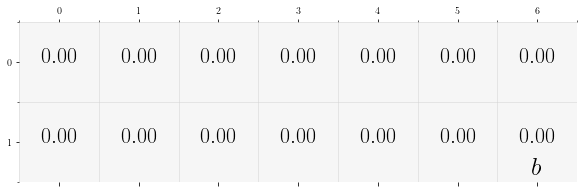

In [119]:
value2=np.max(Q2,axis=4)
# csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.pdf')
csrl2.plot(value2,iq=(0,0))

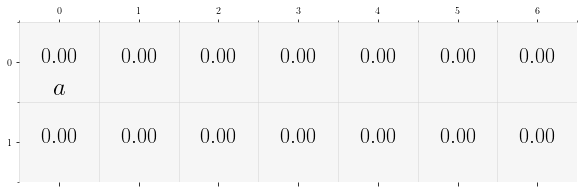

In [120]:
value=np.max(Q1,axis=4)
# csrl.plot(value,iq=(0,0),save='safe_absorbing_states_values.pdf')
csrl1.plot(value,iq=(0,0))

[[[[2 2 2 1 1 1 1]
   [2 2 2 2 2 2 5]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 1]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]]


interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

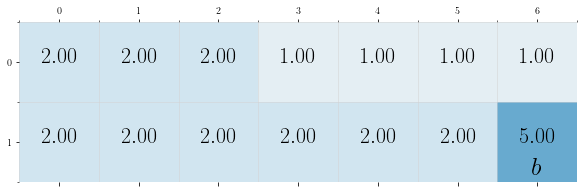

In [121]:
policy2=np.argmax(Q2,axis=4)
print(policy2)
# csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.pdf')
csrl2.plot(value2,policy2)

[[[[5 3 1 2 1 3 3]
   [0 3 3 3 3 0 0]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]

  [[0 0 0 0 0 0 0]
   [0 0 0 0 0 0 0]]]]


interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

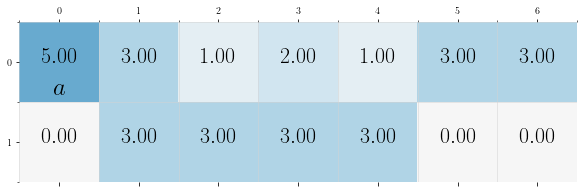

In [122]:
policy=np.argmax(Q1,axis=4)
print(policy)
# csrl.plot(value,policy,iq=(0,0),save='safe_absorbing_states_policy.pdf')
csrl1.plot(value,policy)

In [123]:
policies = [policy, policy2]
agents = [csrl1, csrl2]
mcsrl.simulate( policies, agents, T= 20, mdp2 =comb_mdp, animation="comb_test")

20
e [[(0, 0, 0, 6), (0, 0, 1, 0)]]
0 :  (0, 6) 	 (1, 0)
1 :  (0, 5) 	 (1, 1)
2 :  (0, 4) 	 (1, 2)
3 :  (1, 4) 	 (1, 3)
4 :  (1, 3) 	 (1, 4)
5 :  (1, 2) 	 (1, 5)
6 :  (1, 1) 	 (1, 6)
7 :  (1, 0) 	 (1, 6)
8 :  (0, 0) 	 (1, 6)
9 :  (0, 0) 	 (1, 6)
10 :  (0, 0) 	 (1, 6)
11 :  (0, 0) 	 (1, 6)
12 :  (0, 0) 	 (1, 6)
13 :  (0, 0) 	 (1, 6)
14 :  (0, 0) 	 (1, 6)
15 :  (0, 0) 	 (1, 6)
16 :  (0, 0) 	 (1, 6)
17 :  (0, 0) 	 (1, 6)
18 :  (0, 0) 	 (1, 6)
19 :  (0, 0) 	 (1, 6)


[[(0, 0, 0, 6), (0, 0, 1, 0)],
 [(0, 0, 0, 5), (0, 0, 1, 1)],
 [(0, 0, 0, 4), (0, 0, 1, 2)],
 [(0, 0, 1, 4), (0, 0, 1, 3)],
 [(0, 0, 1, 3), (0, 0, 1, 4)],
 [(0, 0, 1, 2), (0, 0, 1, 5)],
 [(0, 0, 1, 1), (0, 0, 1, 6)],
 [(0, 0, 1, 0), (0, 1, 1, 6)],
 [(0, 0, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)],
 [(0, 1, 0, 0), (0, 1, 1, 6)]]

In [30]:
controls = np.array([csrl1,csrl2], dtype=object)
controls.shape 

(2,)

In [28]:
c = np.zeros(2, dtype = object)
c[0] = csrl1
c

array([<csrl.ControlSynthesis object at 0x0000020D68D536A0>, 0],
      dtype=object)

In [ ]:
state = [[0, 0, 0, 0], [0, 0, 0, 2]]
mcsrl.Q[0][state[0]].shape

In [24]:
mcsrl.starts

[(0, 6), (1, 0)]